# RetailPulse Data Analysis Project

##### Importing Required Libraries

In [782]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import holidays
import requests
import datetime
import plotly.express as px
import random
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing

##### Load the Dataset

In [785]:
data = pd.read_csv('C:/Users/chira/Downloads/archive (1)/shopping_trends.csv')

### Data Cleaning and Preprocessing

In [788]:
data.drop_duplicates(inplace=True)
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
data['review_rating'] = pd.to_numeric(data['review_rating'], errors='coerce')

In [790]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 customer_id                 0
age                         0
gender                      0
item_purchased              0
category                    0
purchase_amount_(usd)       0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64


### External Data Integration

In [793]:
print(data.columns)

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')


In [795]:
start_date = datetime(2022, 1, 1)
data['date'] = [start_date + timedelta(days=random.randint(0, 365)) for _ in range(len(data))]

In [797]:
us_holidays = holidays.US()
data['is_holiday'] = data['date'].apply(lambda x: 1 if x in us_holidays else 0)

In [799]:
# Load your dataset
data = pd.read_csv('C:/Users/chira/Downloads/archive (1)/shopping_trends.csv')

# Add dummy weather data based on seasons
weather_mapping = {
    'Winter': {'avg_temp': -5, 'weather': 'Snowy'},
    'Spring': {'avg_temp': 15, 'weather': 'Rainy'},
    'Summer': {'avg_temp': 30, 'weather': 'Sunny'},
    'Fall': {'avg_temp': 10, 'weather': 'Windy'}
}

# Map weather data to the dataset
data['avg_temp'] = data['Season'].map(lambda x: weather_mapping[x]['avg_temp'])
data['weather'] = data['Season'].map(lambda x: weather_mapping[x]['weather'])

# Save the updated dataset
data.to_csv('shopping_trends_with_weather.csv', index=False)

# Check the dataset
print(data.head())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express           

### Exploratory Data Analysis (EDA)

In [802]:
sales_by_category = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
sales_by_location = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

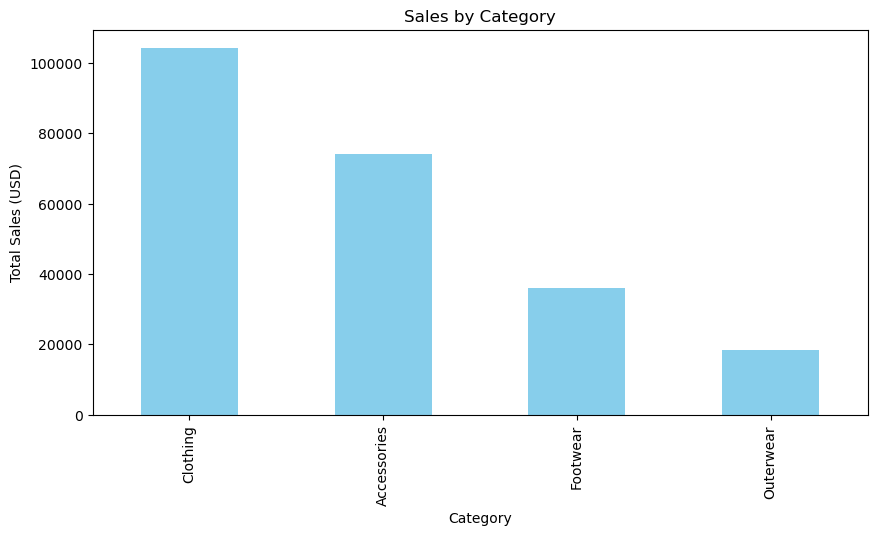

Analysis: The 'Clothing' category significantly outperforms other categories with over 100,000 USD in sales. 'Accessories' and 'Footwear' follow, while 'Outerwear' has the least sales. This indicates that focus should be placed on maintaining inventory for high-performing categories and boosting 'Outerwear' sales through targeted marketing.


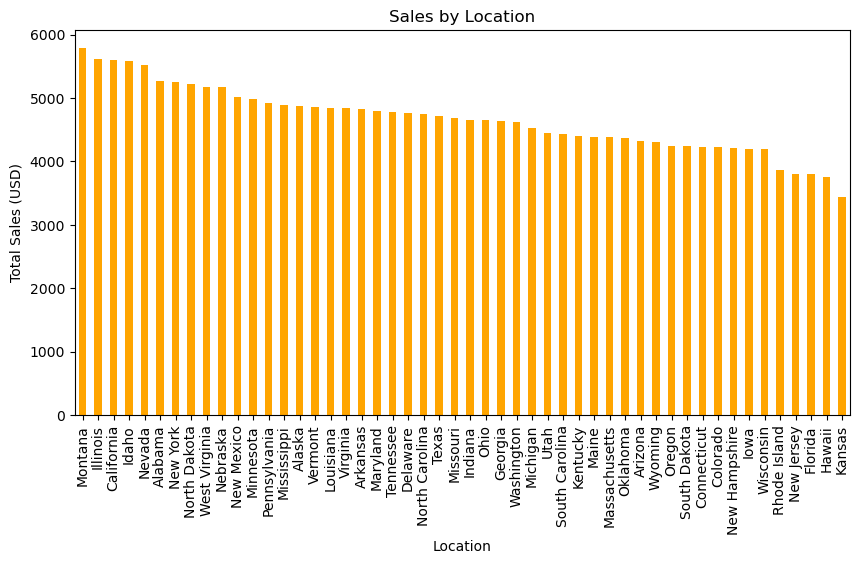

Analysis: The state of Montana leads in total sales, followed closely by California and Illinois. Kansas has the lowest sales. Retailers should investigate reasons behind the underperformance in certain states and design targeted campaigns to boost sales in these regions.


In [804]:
# Sales by Category
plt.figure(figsize=(10, 5))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.ylabel('Total Sales (USD)')
plt.show()

# Description for Sales by Category
print("Analysis: The 'Clothing' category significantly outperforms other categories with over 100,000 USD in sales. "
      "'Accessories' and 'Footwear' follow, while 'Outerwear' has the least sales. This indicates that focus should "
      "be placed on maintaining inventory for high-performing categories and boosting 'Outerwear' sales through targeted marketing.")

# Sales by Location
plt.figure(figsize=(10, 5))
sales_by_location.plot(kind='bar', color='orange')
plt.title('Sales by Location')
plt.ylabel('Total Sales (USD)')
plt.show()

# Description for Sales by Location
print("Analysis: The state of Montana leads in total sales, followed closely by California and Illinois. "
      "Kansas has the lowest sales. Retailers should investigate reasons behind the underperformance in certain states "
      "and design targeted campaigns to boost sales in these regions.")


In [806]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather'],
      dtype='object')


In [808]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Previous Purchases']])

In [810]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['customer_segment'] = kmeans.fit_predict(data_scaled)

#### Impact of Weather on Sales.

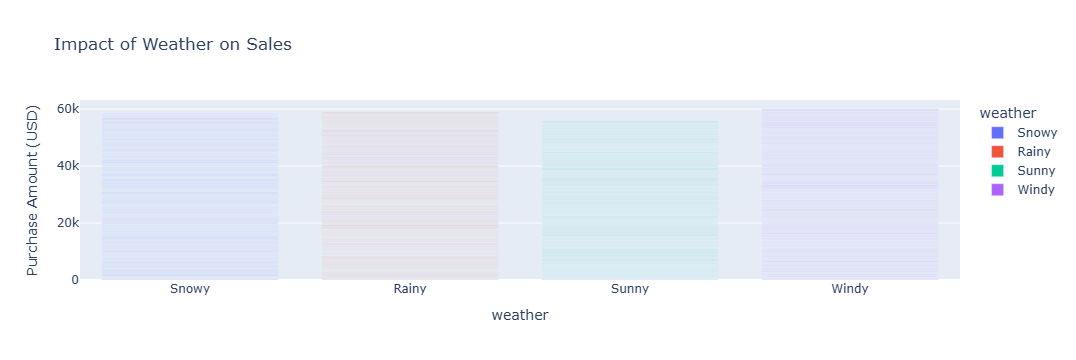

In [813]:
fig = px.bar(data, x='weather', y='Purchase Amount (USD)', color='weather',
             title='Impact of Weather on Sales')
fig.show()

###  Seasonal Impact Analysis

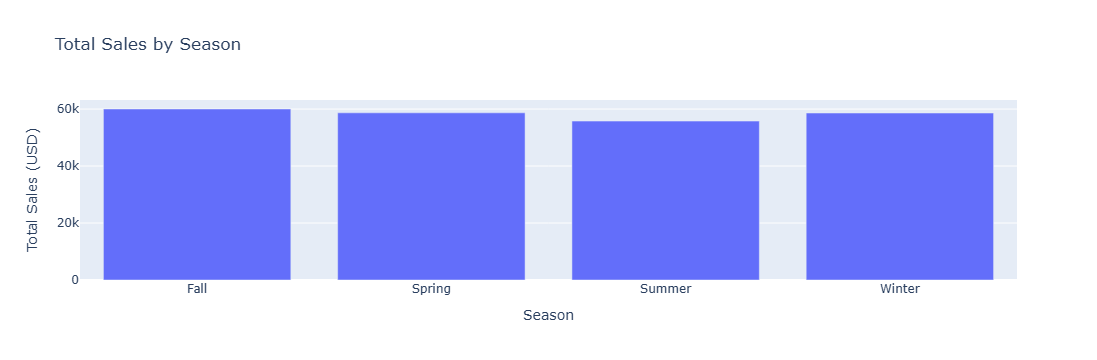

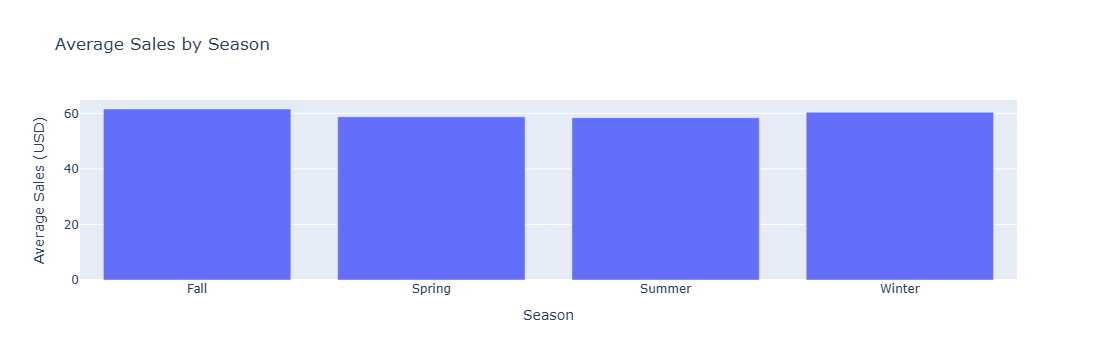

In [816]:
# Group data by 'Season' and calculate total and average sales
seasonal_sales = data.groupby('Season')['Purchase Amount (USD)'].agg(['sum', 'mean']).reset_index()

# Visualize total sales by season
fig = px.bar(seasonal_sales, x='Season', y='sum',
             title="Total Sales by Season",
             labels={'sum': 'Total Sales (USD)'})
fig.show()

# Visualize average sales by season
fig = px.bar(seasonal_sales, x='Season', y='mean',
             title="Average Sales by Season",
             labels={'mean': 'Average Sales (USD)'})
fig.show()

### Seasonal Segmentation

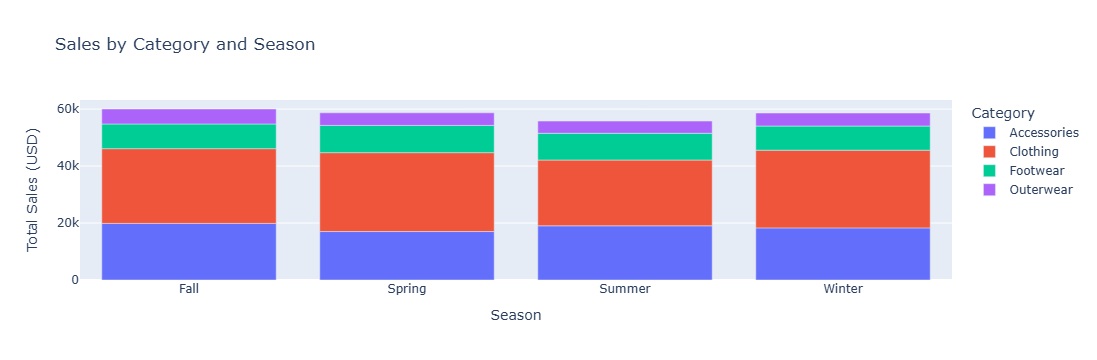

In [819]:
  # Group data by Season and Category to find popular categories per season
category_season = data.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Visualize popular categories per season
fig = px.bar(category_season, x='Season', y='Purchase Amount (USD)', color='Category',
             title="Sales by Category and Season",
             labels={'Purchase Amount (USD)': 'Total Sales (USD)'})
fig.show()

### Clustering Analysis

In [822]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment'],
      dtype='object')


In [824]:
# Select relevant features for clustering (create a copy to avoid SettingWithCopyWarning)
clustering_data = data[['Age', 'Purchase Amount (USD)', 'Frequency of Purchases']].copy()

In [826]:
# Debugging the filtering step
print(f"Initial dataset shape: {data.shape}")

Initial dataset shape: (3900, 22)


In [828]:
# Check for missing or unexpected values
print(f"Missing values in clustering data: {clustering_data.isnull().sum()}")
print(f"Unique values in 'Frequency of Purchases': {clustering_data['Frequency of Purchases'].unique()}")

Missing values in clustering data: Age                       0
Purchase Amount (USD)     0
Frequency of Purchases    0
dtype: int64
Unique values in 'Frequency of Purchases': ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [830]:
# Map categorical values to numeric for 'Frequency of Purchases'
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Annually': 365,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90
}
clustering_data['Frequency of Purchases'] = clustering_data['Frequency of Purchases'].map(frequency_mapping).fillna(0)

In [832]:
# Check dataset after mapping
print(f"After mapping, missing values: {clustering_data.isnull().sum()}")

# Drop rows with missing values
clustering_data = clustering_data.dropna()
print(f"Clustering data shape after cleaning: {clustering_data.shape}")

After mapping, missing values: Age                       0
Purchase Amount (USD)     0
Frequency of Purchases    0
dtype: int64
Clustering data shape after cleaning: (3900, 3)


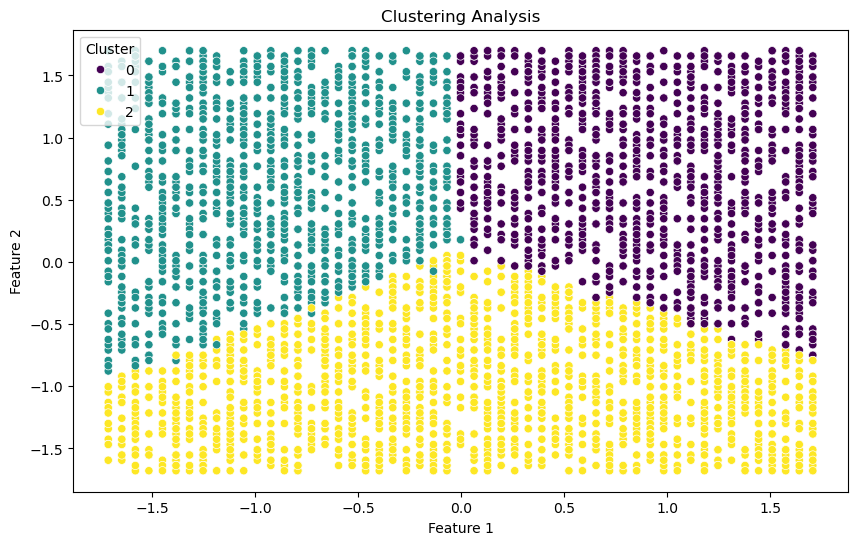

In [834]:
# Ensure dataset is not empty
if clustering_data.shape[0] == 0:
    print("No valid data for clustering. Please review filtering steps.")
else:
    # Standardize the data
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # Perform clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

    # Visualize clustering results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=clustering_data_scaled[:, 0],
        y=clustering_data_scaled[:, 1],
        hue=clustering_data['Cluster'],
        palette='viridis'
    )
    plt.title('Clustering Analysis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### Regression Analysis

In [837]:
data['Campaign'] = np.random.choice(['Campaign_A', 'Campaign_B', 'Campaign_C'], size=len(data))

In [839]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign'],
      dtype='object')


In [841]:
# Check unique values in the column
print(data['Frequency of Purchases'].unique())

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [843]:
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Annually': 365,
    'Quarterly': 90,
    'Bi-weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90
}

# Apply mapping and replace unmapped values with 0
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_mapping).fillna(0)

# Print unique values to confirm successful mapping
print(data['Frequency of Purchases'].unique())

[ 14.   7. 365.  90.   0.  30.]


In [845]:
data['Frequency of Purchases'] = pd.to_numeric(data['Frequency of Purchases'], errors='coerce')

# Check the data type to confirm
print(data['Frequency of Purchases'].dtype)

float64


In [847]:
print(regression_data.columns)

Index(['Age', 'Frequency of Purchases', 'Purchase Amount (USD)'], dtype='object')


In [849]:
regression_data = data[['Age', 'Frequency of Purchases', 'Purchase Amount (USD)']].copy()

In [851]:
X = regression_data.drop(columns=['Purchase Amount (USD)'])
y = regression_data['Purchase Amount (USD)']

In [853]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)

Mean Squared Error: 564.5464014307929
R-Squared Score: -0.008870954279704746


### Advanced Analysis

In [856]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign'],
      dtype='object')


In [858]:
# Linear Regression to Analyze Drivers of Sales
X = data[['Age', 'Previous Purchases', 'Review Rating']]
y = data['Purchase Amount (USD)']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

In [860]:
# Model Evaluation
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 560.2304530962426
R^2 Score: 0.0011117107735826304


#### Customer Lifetime Value (CLV) Calculation

In [863]:
# Calculate Average Purchase Value
data['Purchase Frequency'] = data['Previous Purchases'] / (data['Previous Purchases'].count() / len(data))
average_purchase_value = data['Purchase Amount (USD)'].mean()

# Calculate CLV
clv = average_purchase_value * data['Purchase Frequency'] * 12  # Assuming 12 months
data['CLV'] = clv

# Display the top 5 customers with the highest CLV
print(data[['Customer ID', 'CLV']].sort_values(by='CLV', ascending=False).head())


      Customer ID           CLV
3261         3262  35858.615385
633           634  35858.615385
2262         2263  35858.615385
2264         2265  35858.615385
124           125  35858.615385


### Visualization

In [866]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign', 'Purchase Frequency', 'CLV'],
      dtype='object')


In [868]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [870]:
data = data.dropna(subset=['Age', 'Previous Purchases', 'Review Rating', 'Purchase Amount (USD)'])

In [872]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select numeric columns for regression
X = data[['Age', 'Purchase Frequency', 'CLV']]  # Ensure these are numeric columns
y = data['Purchase Amount (USD)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Predictions:", predictions[:5])

Model Coefficients: [-2.13486261e-02  1.89251708e-09  1.35726084e-06]
Model Intercept: 61.05847851479823
Predictions: [60.04347838 60.45494263 60.22990765 59.65537554 60.03867741]


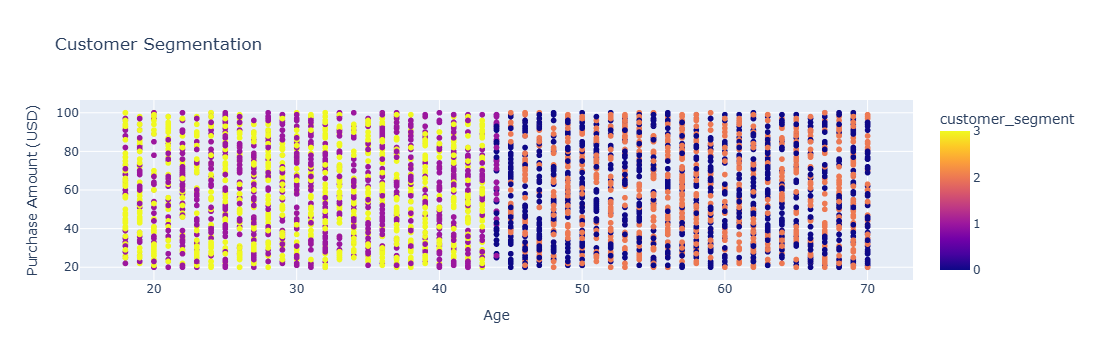

In [874]:
import plotly.express as px

# Scatter plot for customer segmentation
fig = px.scatter(
    data,
    x='Age',  # x-axis
    y='Purchase Amount (USD)',  # y-axis
    color='customer_segment',  # Color-coded by customer segment
    title='Customer Segmentation',
    labels={'x': 'Age', 'y': 'Purchase Amount (USD)'}
)
fig.show()

###  Suggestions for Improving Sales and Optimizing Product Placements

#### Identify High-Demand Categories During Holidays

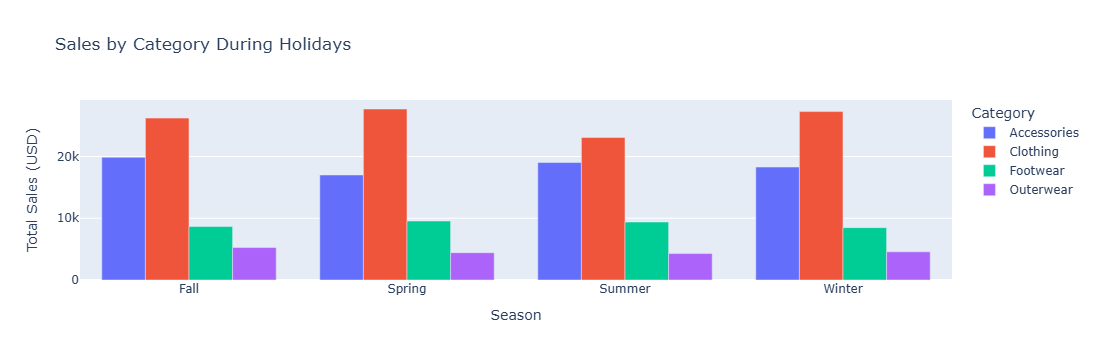

In [878]:
# Group sales data by Season and Category
holiday_sales = data.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart to visualize sales trends by season and category
import plotly.express as px

holiday_sales_fig = px.bar(
    holiday_sales,
    x='Season',
    y='Purchase Amount (USD)',
    color='Category',
    barmode='group',
    title="Sales by Category During Holidays"
)

# Update chart layout
holiday_sales_fig.update_layout(
    xaxis_title="Season",
    yaxis_title="Total Sales (USD)",
    legend_title="Category"
)

# Display the chart
holiday_sales_fig.show()

#### Optimize Product Placements

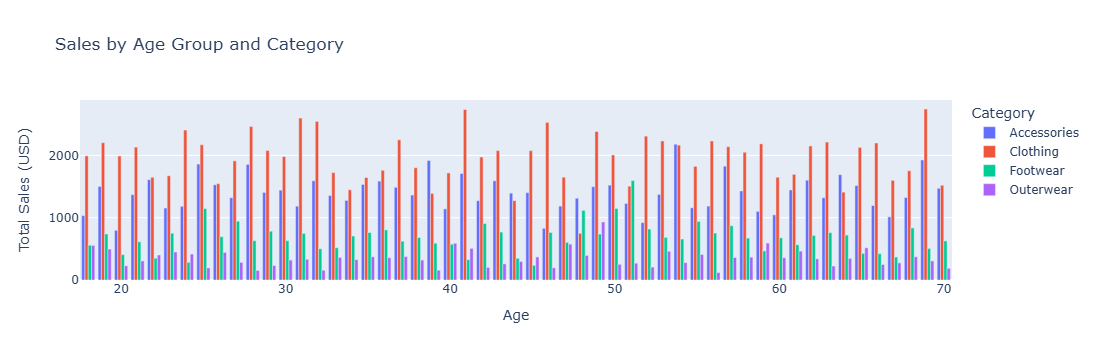

In [881]:
# Group sales data by Age and Category
age_category_sales = data.groupby(['Age', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart to visualize sales trends by age and category
age_category_fig = px.bar(
    age_category_sales,
    x='Age',
    y='Purchase Amount (USD)',
    color='Category',
    title="Sales by Age Group and Category",
    barmode='group'
)

# Update chart layout
age_category_fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Total Sales (USD)",
    legend_title="Category"
)

# Display the chart
age_category_fig.show()

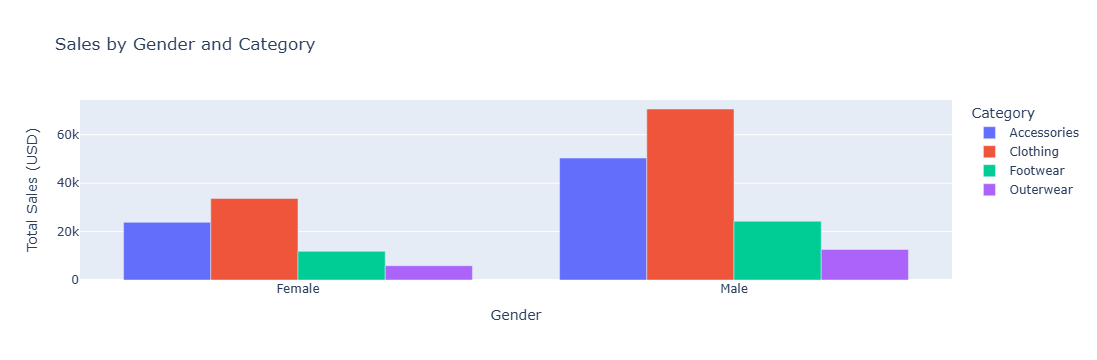

In [883]:
# Group sales data by Gender and Category
gender_category_sales = data.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart to visualize sales trends by gender and category
gender_category_fig = px.bar(
    gender_category_sales,
    x='Gender',
    y='Purchase Amount (USD)',
    color='Category',
    title="Sales by Gender and Category",
    barmode='group'
)

# Update chart layout
gender_category_fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Total Sales (USD)",
    legend_title="Category"
)

# Display the chart
gender_category_fig.show()

#### Recommendations for furtue Enchancement 

In [886]:
recommendations = """
1. *Inventory Management:* Stock up with popular items for holiday seasons to meet demand both in-store and online.
2. *Product Placement:* Top-selling products have to be placed in the most visible areas, both in-store and online, for maximum appeal to customers.
3. *Target Marketing:* Focused marketing campaigns on select groups of customers will do much more in helping exploit this opportunity, especially during peak seasons.
4. *Promotions:* Run pre-season and in-season discounts to drive early shopping and increase sales.
5. *Weather-Driven Campaigns:* Create and publish dynamic marketing campaigns according to the weather forecast, such as running ads for warm winter wear on snowy days or rain gear on rainy days.
6. *Loyalty Programs:* Reward your best customers with special offers or exclusive memberships to keep them engaged and coming back.

"""

print(recommendations)


1. *Inventory Management:* Stock up with popular items for holiday seasons to meet demand both in-store and online.
2. *Product Placement:* Top-selling products have to be placed in the most visible areas, both in-store and online, for maximum appeal to customers.
3. *Target Marketing:* Focused marketing campaigns on select groups of customers will do much more in helping exploit this opportunity, especially during peak seasons.
4. *Promotions:* Run pre-season and in-season discounts to drive early shopping and increase sales.
5. *Weather-Driven Campaigns:* Create and publish dynamic marketing campaigns according to the weather forecast, such as running ads for warm winter wear on snowy days or rain gear on rainy days.
6. *Loyalty Programs:* Reward your best customers with special offers or exclusive memberships to keep them engaged and coming back.




### Bonus Task

#### Add a Module to Analyze Marketing Campaign Effectiveness

In [890]:
# Ensure 'Campaign' column exists
if 'Campaign' not in data.columns:
    # Create a synthetic campaign based on purchase amount
    data['Campaign'] = data['Purchase Amount (USD)'].apply(
        lambda x: 'High Campaign' if x > 100 else 'Low Campaign'
    )

# Analyze the impact of campaigns
campaign_analysis = data.groupby('Campaign')['Purchase Amount (USD)'].sum()
print(campaign_analysis)

Campaign
Campaign_A    79293
Campaign_B    75612
Campaign_C    78176
Name: Purchase Amount (USD), dtype: int64


Seasonal Trends:
Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


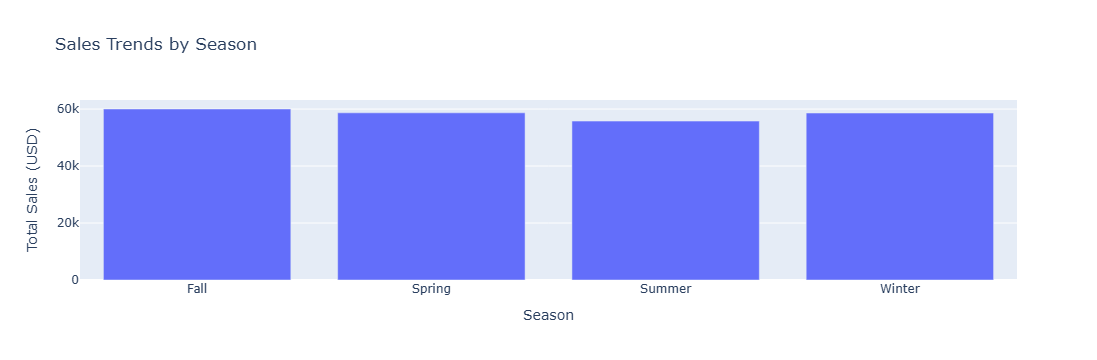

In [892]:
# Grouping by Season to analyze sales trends
seasonal_trends = data.groupby('Season')['Purchase Amount (USD)'].sum()
print("Seasonal Trends:")
print(seasonal_trends)

# Visualizing Seasonal Trends
import plotly.express as px

fig = px.bar(
    x=seasonal_trends.index, 
    y=seasonal_trends.values, 
    title="Sales Trends by Season", 
    labels={'x': 'Season', 'y': 'Total Sales (USD)'}
)
fig.show()

In [894]:
data.columns = data.columns.str.strip()

In [896]:
campaign_analysis = data.groupby('Campaign')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count']).reset_index()
print("Campaign Effectiveness Analysis:")
print(campaign_analysis)

Campaign Effectiveness Analysis:
     Campaign       mean    sum  count
0  Campaign_A  60.161608  79293   1318
1  Campaign_B  59.583924  75612   1269
2  Campaign_C  59.539985  78176   1313


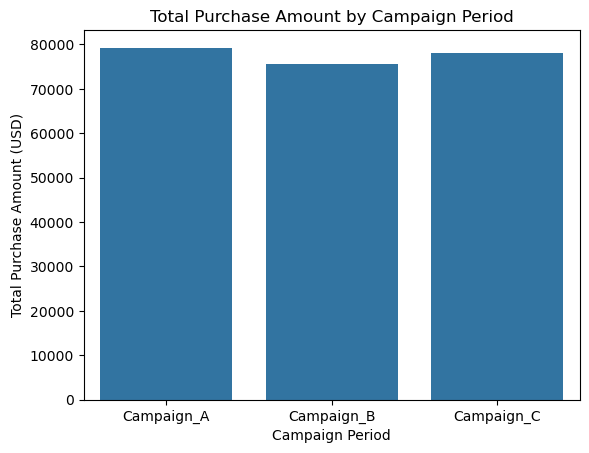

In [898]:
import seaborn as sns

sns.barplot(x='Campaign', y='sum', data=campaign_analysis)
plt.title('Total Purchase Amount by Campaign Period')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Campaign Period')
plt.show()

#### Forecasting (Bonus Task)

##### Using ARIMA for Forecasting

In [902]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign', 'Purchase Frequency', 'CLV'],
      dtype='object')


In [904]:
# Load the data (update the path as necessary)
data = pd.read_csv('C:/Users/chira/Downloads/archive (1)/shopping_trends.csv')

# Use a column as the value to forecast (replace 'purchase_amount_(usd)' with your column name)
data['Purchase Amount (USD)'] = data['Purchase Amount (USD)'].fillna(0)  # Fill missing values

# Use sequential indices as time
data['time_index'] = np.arange(len(data))

# Aggregate purchase amounts by the sequential time index (if necessary)
forecast_data = data.groupby('time_index')['Purchase Amount (USD)'].sum().reset_index()

# Set up the time series
ts = forecast_data['Purchase Amount (USD)']

# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(ts, seasonal=None, trend='add', damped_trend=True).fit()

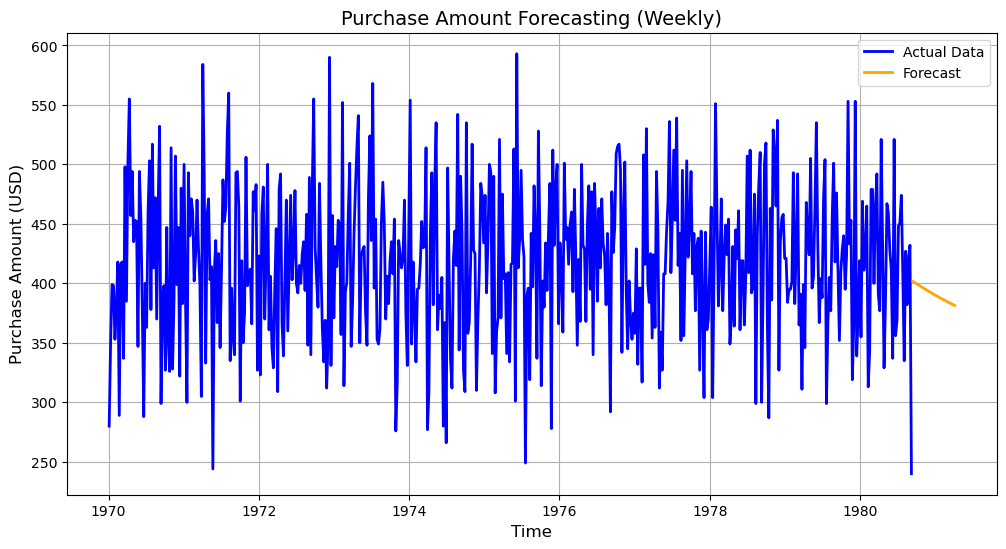

In [906]:
# Aggregate the data by weekly or monthly intervals for clarity
data['time_index'] = pd.to_datetime(data.index, unit='D')  # Convert index to datetime
data.set_index('time_index', inplace=True)
data_weekly = data['Purchase Amount (USD)'].resample('W').sum()  # Aggregate by weeks

# Apply the Holt-Winters Smoothing for forecasting
model = ExponentialSmoothing(data_weekly, seasonal=None, trend='add', damped_trend=True).fit()

# Forecast the next 30 weeks
forecast_steps = 30
forecast = model.forecast(steps=forecast_steps)

# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data_weekly, label='Actual Data', color='blue', linewidth=2)
plt.plot(forecast, label='Forecast', color='orange', linewidth=2)
plt.title('Purchase Amount Forecasting (Weekly)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()